In [19]:
import matplotlib.pyplot as plt
import pandas as pd

result = pd.read_csv("account_clean.csv")
result.info()        # 数据类型，内存消耗等信息



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   account_id    302 non-null    object
 1   Status        302 non-null    object
 2   fpc_status    302 non-null    object
 3   ou_name       302 non-null    object
 4   ou_id         302 non-null    object
 5   account_area  292 non-null    object
 6   account_type  226 non-null    object
 7   orbit         287 non-null    object
dtypes: object(8)
memory usage: 19.0+ KB


In [20]:
result.describe()    # 统计特征，均值方差等

,account_id,Status,fpc_status,ou_name,ou_id,account_area,account_type,orbit
count,302,302,302,302,302,292,226,287
unique,302,2,3,10,10,4,3,2
top,'172688832633',ACTIVE,enabled,Halt,ou-iv0p-a9u7znp3,FPC,default,Non-Orbit
freq,1,240,257,66,66,158,116,243


In [21]:
result = result.query("orbit.notnull() or orbit == 'xxx'")
result

,account_id,Status,fpc_status,ou_name,ou_id,account_area,account_type,orbit
0,'172688832633',ACTIVE,enabled,CDH(Advanced),ou-iv0p-ac92i7kp,CDH,advanced,Non-Orbit
1,'173679732911',ACTIVE,enabled,CDH(Advanced),ou-iv0p-ac92i7kp,CDH,advanced,Non-Orbit
2,'179158169094',ACTIVE,enabled,CDH(Advanced),ou-iv0p-ac92i7kp,CDH,advanced,Non-Orbit
3,'320707650407',ACTIVE,enabled,CDH(Advanced),ou-iv0p-ac92i7kp,CDH,advanced,Non-Orbit
4,'321176096694',ACTIVE,enabled,CDH(Advanced),ou-iv0p-ac92i7kp,CDH,advanced,Non-Orbit
...,...,...,...,...,...,...,...,...
296,'424206487579',ACTIVE,enabled,Operations,ou-iv0p-8htcpgwz,ShareService,default,Non-Orbit
297,'424285566716',ACTIVE,enabled,Operations,ou-iv0p-8htcpgwz,ShareService,default,Non-Orbit
299,'183749528048',ACTIVE,enabled,Architecting,ou-iv0p-9w0seqm8,ShareService,davanced,Non-Orbit
300,'421807133856',ACTIVE,enabled,Architecting,ou-iv0p-9w0seqm8,ShareService,davanced,Non-Orbit


In [22]:

group_result = result.groupby(['Status','account_area']).count().reset_index()
group_result

,Status,account_area,account_id,fpc_status,ou_name,ou_id,account_type,orbit
0,ACTIVE,CDH,11,11,11,11,11,11
1,ACTIVE,ConnectedDrive,98,98,98,98,98,98
2,ACTIVE,FPC,102,102,102,102,98,102
3,ACTIVE,ShareService,16,16,16,16,16,16
4,SUSPENDED,FPC,44,44,44,44,0,44
5,SUSPENDED,ShareService,6,6,6,6,0,6


In [23]:
# head()方法，不指定行数，则默认显示5行，单列的类型是Series

# [['account_id','x']] 过滤多个字段
# group_result = result.groupby(by=['Status','account_area'])[['account_id']].agg([("count_total","count")]).reset_index()

# ['account_id'] 过滤一个字段
group_result = result.groupby(by=['Status','account_area'])['account_id'].agg([("count_total","count")]).reset_index()
group_result

,Status,account_area,count_total
0,ACTIVE,CDH,11
1,ACTIVE,ConnectedDrive,98
2,ACTIVE,FPC,102
3,ACTIVE,ShareService,16
4,SUSPENDED,FPC,44
5,SUSPENDED,ShareService,6


two_level_index_series: 
Status     account_area  
ACTIVE     CDH                11
           ConnectedDrive     98
           FPC               102
           ShareService       16
SUSPENDED  FPC                44
           ShareService        6
Name: count_total, dtype: int64
new_df: 
            CDH  ConnectedDrive    FPC  ShareService
Status                                              
ACTIVE     11.0            98.0  102.0          16.0
SUSPENDED   NaN             NaN   44.0           6.0


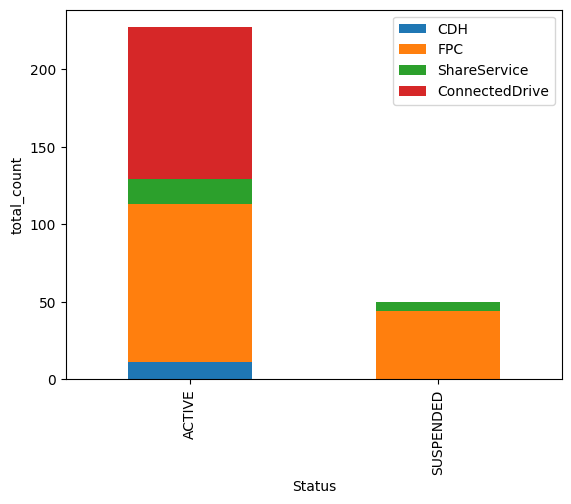

In [24]:

# 行转列 : https://www.cnblogs.com/ElonJiang/p/16486111.html
# 将"Status"和"account_area"设置为索引, 然后取出"count_total"这一列, 得到对应的具有二级索引的 Series 对象
two_level_index_series = group_result.set_index(["Status", "account_area"])["count_total"]
print("two_level_index_series: ")
print(two_level_index_series)

# 调用具有二级索引的Series的unstack, 会得到一个DataFrame
# 并会自动把一级索引变成DataFrame的索引, 二级索引变成DataFrame的列
new_df = two_level_index_series.unstack()

# 可以通过 rename_axis(index=, columns=) 来给坐标轴重命名
new_df = new_df.rename_axis(columns=None)
print("new_df: ")
print(new_df)

# 这里我们只给列重命名, 没有给索引重命名, 至于原因请往下看
new_df = new_df.reset_index()

new_df.plot.bar(stacked=True,x='Status',y=['CDH','FPC','ShareService','ConnectedDrive'])
plt.xlabel("Status")
plt.ylabel("total_count")
plt.show()
